## Q2: OpenCV

### a. Generate a colored image.

In [6]:
import numpy as np
import os
import cv2
from matplotlib import pyplot as plt

In [42]:
# Defining image dimensions
width, height = 256, 256

# Create a blank image with black background
image = np.ones((height, width, 3), dtype=np.uint8) * 0

In [44]:
# Define the number of circles and their properties
num_circles = 7
radius = 25

In [46]:
color = np.random.randint(0, 256, (3,)).tolist()
print("The colors are", color)

The colors are [111, 108, 201]


In [48]:
# set centers
center = [(105,40),(170,40),(40,105),(105,105),(170,105),(40,170),(105,170)]
print(center[0])

(105, 40)


In [50]:
for c in range(num_circles):
    # Generate random color
    color = np.random.randint(0, 256, (3,)).tolist()
    # Generate random circle position
    
    # Draw the circle
    cv2.circle(image, center[c], radius, color, -1)  # -1 fills the circle

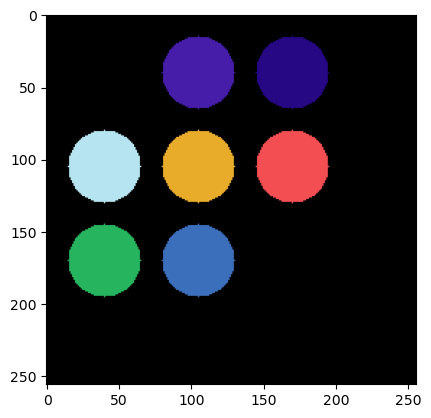

In [52]:
plt.imshow(image);

### b. Display r, g and b planes separately from the image in problem 1a. 
### - Convert this image to HSI (HSV) color space and display 3 different planes.

In [69]:
print(np.shape(image))

(256, 256, 3)


In [77]:
b,g,r = cv2.split(image)

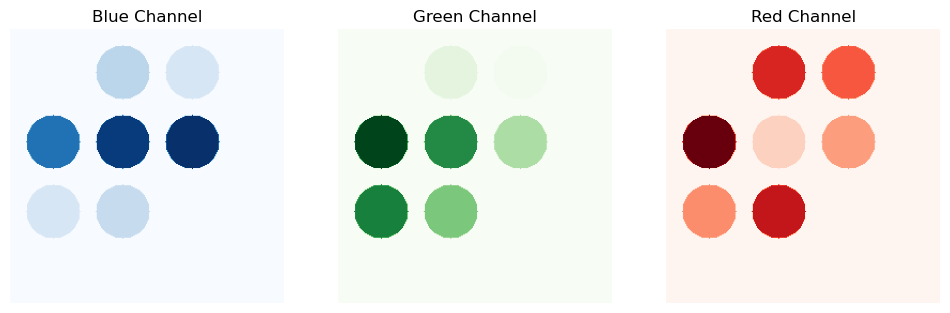

In [83]:
plt.figure(figsize=(12, 4));
plt.subplot(1,3,1)
plt.imshow(b,cmap='Blues');
plt.title('Blue Channel')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(g, cmap='Greens');
plt.title('Green Channel')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(r, cmap='Reds');
plt.title('Red Channel')
plt.axis('off')
plt.show()

In [85]:
image_HSV = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(image_HSV)

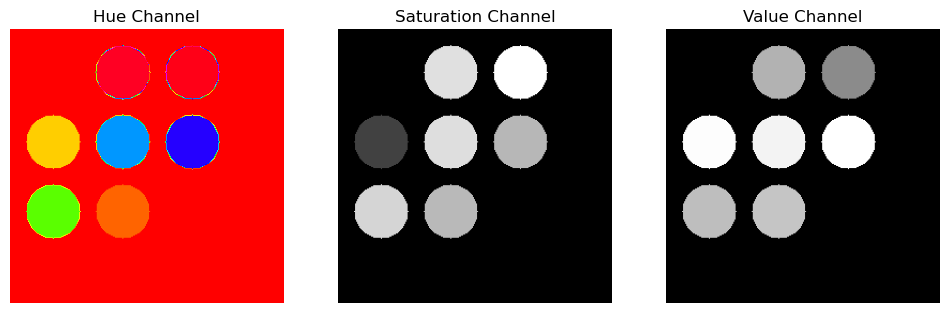

In [87]:
plt.figure(figsize=(12, 4));
plt.subplot(1,3,1)
plt.imshow(h,cmap='hsv');
plt.title('Hue Channel')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(s, cmap='gray');
plt.title('Saturation Channel')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(v, cmap='gray');
plt.title('Value Channel')
plt.axis('off')
plt.show()

In [89]:
print(np.shape(h))

(256, 256)


In [93]:
print(h.dtype)

uint8


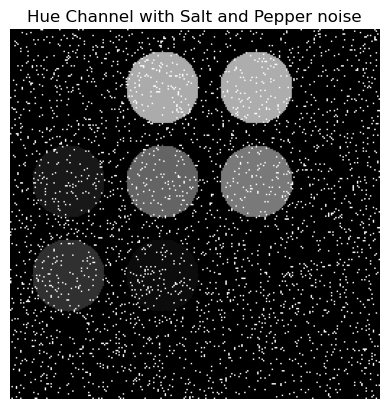

In [99]:
h_gray = h
# Adding salt and pepper noise:
noise_level = 0.05
SnP_noise = np.random.choice([0,255], size = h.shape, p=[1- noise_level, noise_level])
SnP_noise = SnP_noise.astype(h.dtype)
h_SnP = cv2.add(h_gray,SnP_noise)

plt.imshow(h_SnP,cmap='gray');
plt.title('Hue Channel with Salt and Pepper noise')
plt.axis('off')
plt.show()

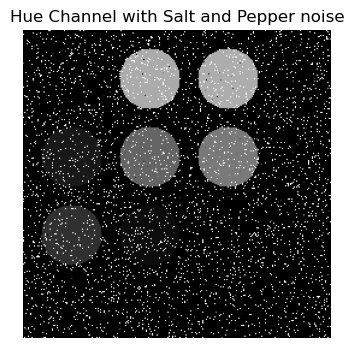

In [111]:
# Add random noise to the image
num_pixels = 200
rows, cols = h_SnP.shape
for _ in range(num_pixels):
    x = np.random.randint(0, rows)
    y = np.random.randint(0, cols)
    h_SnP[x, y] = np.random.randint(0, 256)

plt.figure(figsize=(12, 4));
plt.subplot(1,2,1)
plt.imshow(h_SnP,cmap='gray');
plt.title('Hue Channel with Salt and Pepper noise')
plt.axis('off')
plt.show()